In [249]:
#importation des librairies necessaire

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.pyplot as plt

import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

!pip install cvxopt
import numpy as np
import time
from cvxopt import matrix, solvers

In [250]:
#1. Effectuer un prétraitement pour uniformiser les données traitées.



# 1-a. Chargement du Dataset
# Remplacez 'diabetes.csv' par le nom de votre fichier
df = pd.read_csv('/kaggle/input/diabetes/diabetes-1.csv')

# Aperçu des premières lignes du dataset
print(df.head(20))

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80            

In [251]:
# 1-b. Gestion des Valeurs Manquantes
# Vérification des valeurs manquantes
print("Valeurs manquantes par colonne :\n")
print(df.isnull().sum())

# Supposons qu'il y ait des valeurs manquantes pour certaines colonnes numériques, 
# on peut les remplir avec la médiane de chaque colonne
df.fillna(df.median(), inplace=True)


Valeurs manquantes par colonne :

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [252]:
# 1-c. Standardisation et Normalisation
# Standardisation des colonnes numériques (par exemple : âge, taux d'insuline, etc.)
# Remplacez les noms de colonnes par ceux qui sont dans votre dataset
# colonnes_a_standardiser = ['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

# scaler = StandardScaler()
# df[colonnes_a_standardiser] = scaler.fit_transform(df[colonnes_a_standardiser])

In [253]:
# 1-d. Traitement des Valeurs Abérrantes (exemple simple pour les valeurs très extrêmes)
# Suppression des valeurs aberrantes dans 'Insulin' en utilisant les quantiles
# Q1 = df['Insulin'].quantile(0.25)
# Q3 = df['Insulin'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df = df[(df['Insulin'] >= lower_bound) & (df['Insulin'] <= upper_bound)]

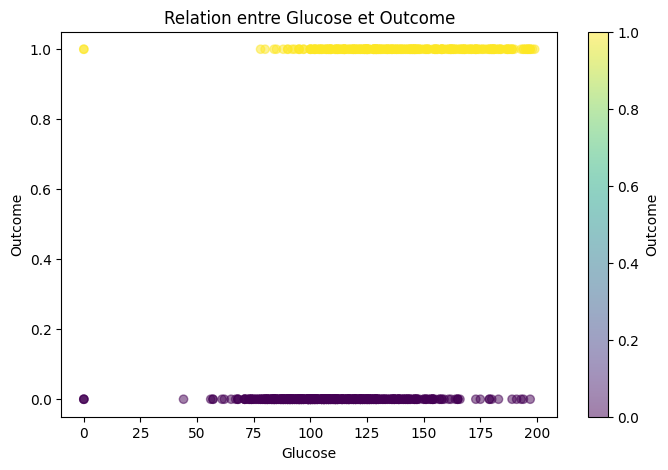

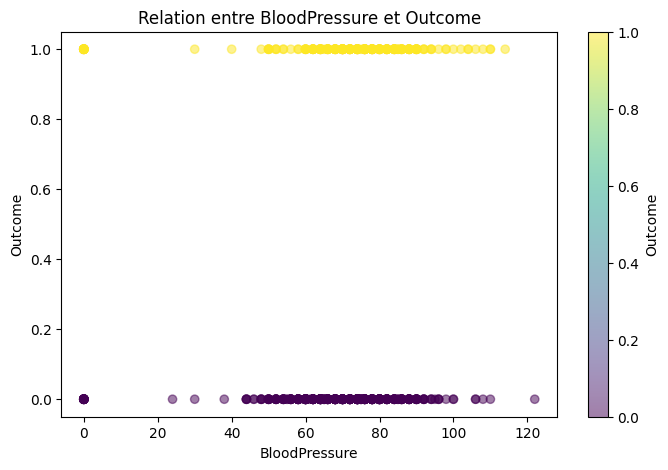

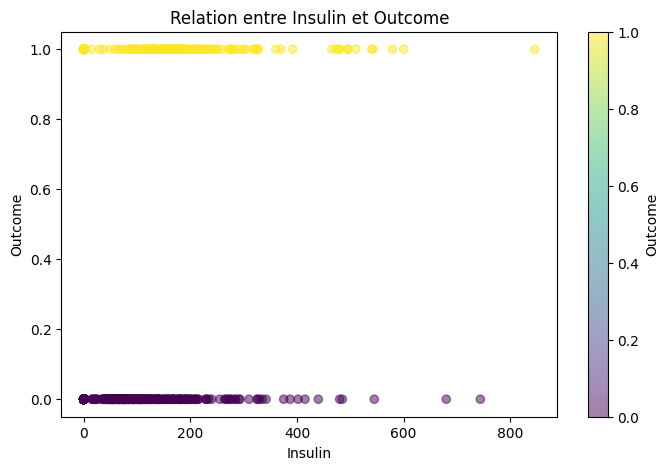

In [254]:
#2.Visualiser les données pour montrer le degré d’influence d’un attribut par rapport à la classe finale.



# Liste des variables que vous souhaitez comparer avec la classe cible 'Outcome'
variables = ['Glucose', 'BloodPressure', 'Insulin']  # Remplacez par vos variables d'intérêt

# Parcourir chaque variable et tracer un graphique de dispersion
for var in variables:
    plt.figure(figsize=(8, 5))  # Taille de la figure
    plt.scatter(df[var], df['Outcome'], alpha=0.5, c=df['Outcome'], cmap='viridis')
    plt.title(f'Relation entre {var} et Outcome')
    plt.xlabel(var)
    plt.ylabel('Outcome')
    plt.colorbar(label='Outcome')
    plt.show()


In [255]:
# 3. Choisir les variables d’entrainement / la variable cible.

X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [256]:
#Découper votre jeu de données en deux parties : entrainement et teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Prétraitement terminé. Données prêtes pour l'entraînement du modèle.")


Prétraitement terminé. Données prêtes pour l'entraînement du modèle.


In [257]:
#v. Mettre en œuvre l’algorithme d’apprentissage : KNN. Calculer le taux d’accuracy et son temps d’exécution.

# Initialiser le classifieur KNN avec un certain nombre de voisins (par exemple, k=5)
knn = KNeighborsClassifier(n_neighbors=19)

# Enregistrer le temps de début
start_time = time.time()

# Entraîner le modèle
knn.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = knn.predict(X_test)

# Calculer le temps d'exécution
execution_time = time.time() - start_time

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Taux de précision (accuracy) : {accuracy:.2f}")
print(f"Temps d'exécution : {execution_time:.4f} secondes")


Taux de précision (accuracy) : 0.80
Temps d'exécution : 0.0227 secondes


In [258]:
# Mise en œuvre du SVM

def svm_train(X, y, C=1.0):
    # Convertir X et y en tableaux NumPy
    X = np.array(X)
    y = np.array(y)

    # Dimensions de X
    m, n = X.shape

    # Calcul de la matrice de Gram (produits scalaires entre chaque paire d'exemples)
    K = np.dot(X, X.T) * np.outer(y, y)

    # Convertir en matrices cvxopt pour l'optimisation
    P = matrix(K)
    q = matrix(-np.ones(m))
    G = matrix(np.vstack((-np.eye(m), np.eye(m))))
    h = matrix(np.hstack((np.zeros(m), np.ones(m) * C)))  # C est le paramètre de régularisation
    A = matrix(y, (1, m), 'd')
    b = matrix(0.0)

    # Résoudre le problème d'optimisation
    solvers.options['show_progress'] = False
    solution = solvers.qp(P, q, G, h, A, b)

    # Extraire les lagrangiens (alpha)
    alphas = np.array(solution['x']).flatten()

    # Calculer le vecteur de poids w
    w = np.sum((alphas * y)[:, None] * X, axis=0)

    # Calculer le biais b
    cond = (alphas >= 0.1)
    b = y[cond] - np.dot(X[cond], w)
    b = np.mean(b)
    
    return w, b


def svm_predict(X, w, b):
    # Prédire les classes
    return np.sign(np.dot(X, w) + b)




In [259]:
# Paramètre de régularisation
C = 1.0

# Diviser les données en ensembles d'entraînement et de test (supposons X_train, y_train, X_test, y_test)

# Enregistrer le temps de début
start_time = time.time()

# Entraîner le modèle SVM
w, b = svm_train(X_train, y_train)

# Calculer le temps d'exécution
execution_time = time.time() - start_time

# Faire des prédictions
y_pred = svm_predict(X_test, w, b)

# Calculer l'accuracy
accuracy = np.mean(y_pred == y_test)

print(f"Taux de précision (accuracy) : {accuracy:.2f}")
print(f"Temps d'exécution : {execution_time:.4f} secondes")


Taux de précision (accuracy) : 0.18
Temps d'exécution : 0.3040 secondes


In [261]:
# Decision tree

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

# Création et entraînement de l'arbre de décision
dt_model = DecisionTreeClassifier(max_depth=5, random_state=0)
start_time = time.time()
dt_model.fit(X_train, y_train)
execution_time = time.time() - start_time

# Prédictions
y_pred = dt_model.predict(X_test)

# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Temps d'exécution: {execution_time:.4f} secondes")


Accuracy: 75.32%
Temps d'exécution: 0.0078 secondes
